In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df_train = pd.read_csv("blackfriday_train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [32]:
df_test = pd.read_csv("blackfriday_test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [33]:
df=df_train.append(df_test) #merge can also be used, always add at the bottom not randomly

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [35]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [36]:
df.drop(["User_ID"], axis = 1, inplace=True)

In [37]:
df.Gender.value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [38]:
df["Gender"]=df["Gender"].map({"F": 0, "M": 1}) # the way could be 
#df["Gender"] = pd.get_dummies(df["Gender"], drop_first=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [39]:
df.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [40]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [41]:
df["Age"]=df["Age"].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})
#the other way could be label encoding

#sample code of label encoding to try
# Import label encoder
#from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
#df['Age']= label_encoder.fit_transform(df['Age'])
  
#df['Age'].unique()

In [42]:
df["Age"].head()

0    1
1    1
2    1
3    1
4    7
Name: Age, dtype: int64

In [16]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Agelabel']= label_encoder.fit_transform(df['Age'])
  
df['Agelabel'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [43]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [44]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [45]:
df_city = pd.get_dummies(df["City_Category"], drop_first=True)
df = pd.concat([df, df_city], axis=1)

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [57]:
df.drop("City_Category", axis = 1, inplace =True) #inplace=True assign this command to same dataframe hence you dont need to write df = then command

KeyError: "['City_Category'] not found in axis"

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [59]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [60]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [61]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [62]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [64]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [65]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [66]:
df.Product_Category_2.mode()

0    8.0
dtype: float64

In [69]:
df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])

In [70]:
df.Product_Category_2.unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [71]:
df.Product_Category_3 = df.Product_Category_3.fillna(df.Product_Category_3.mode()[0])
df.Product_Category_3.unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [72]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [82]:
#df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace(".","")

C:\Users\cheta\AppData\Local\Temp/ipykernel_19560/3596417804.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace(".","")


In [83]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [84]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [85]:
#convert object into inter
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [88]:
#not important but can be done
df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

In [92]:
df1=df.drop("Product_ID", axis=1)

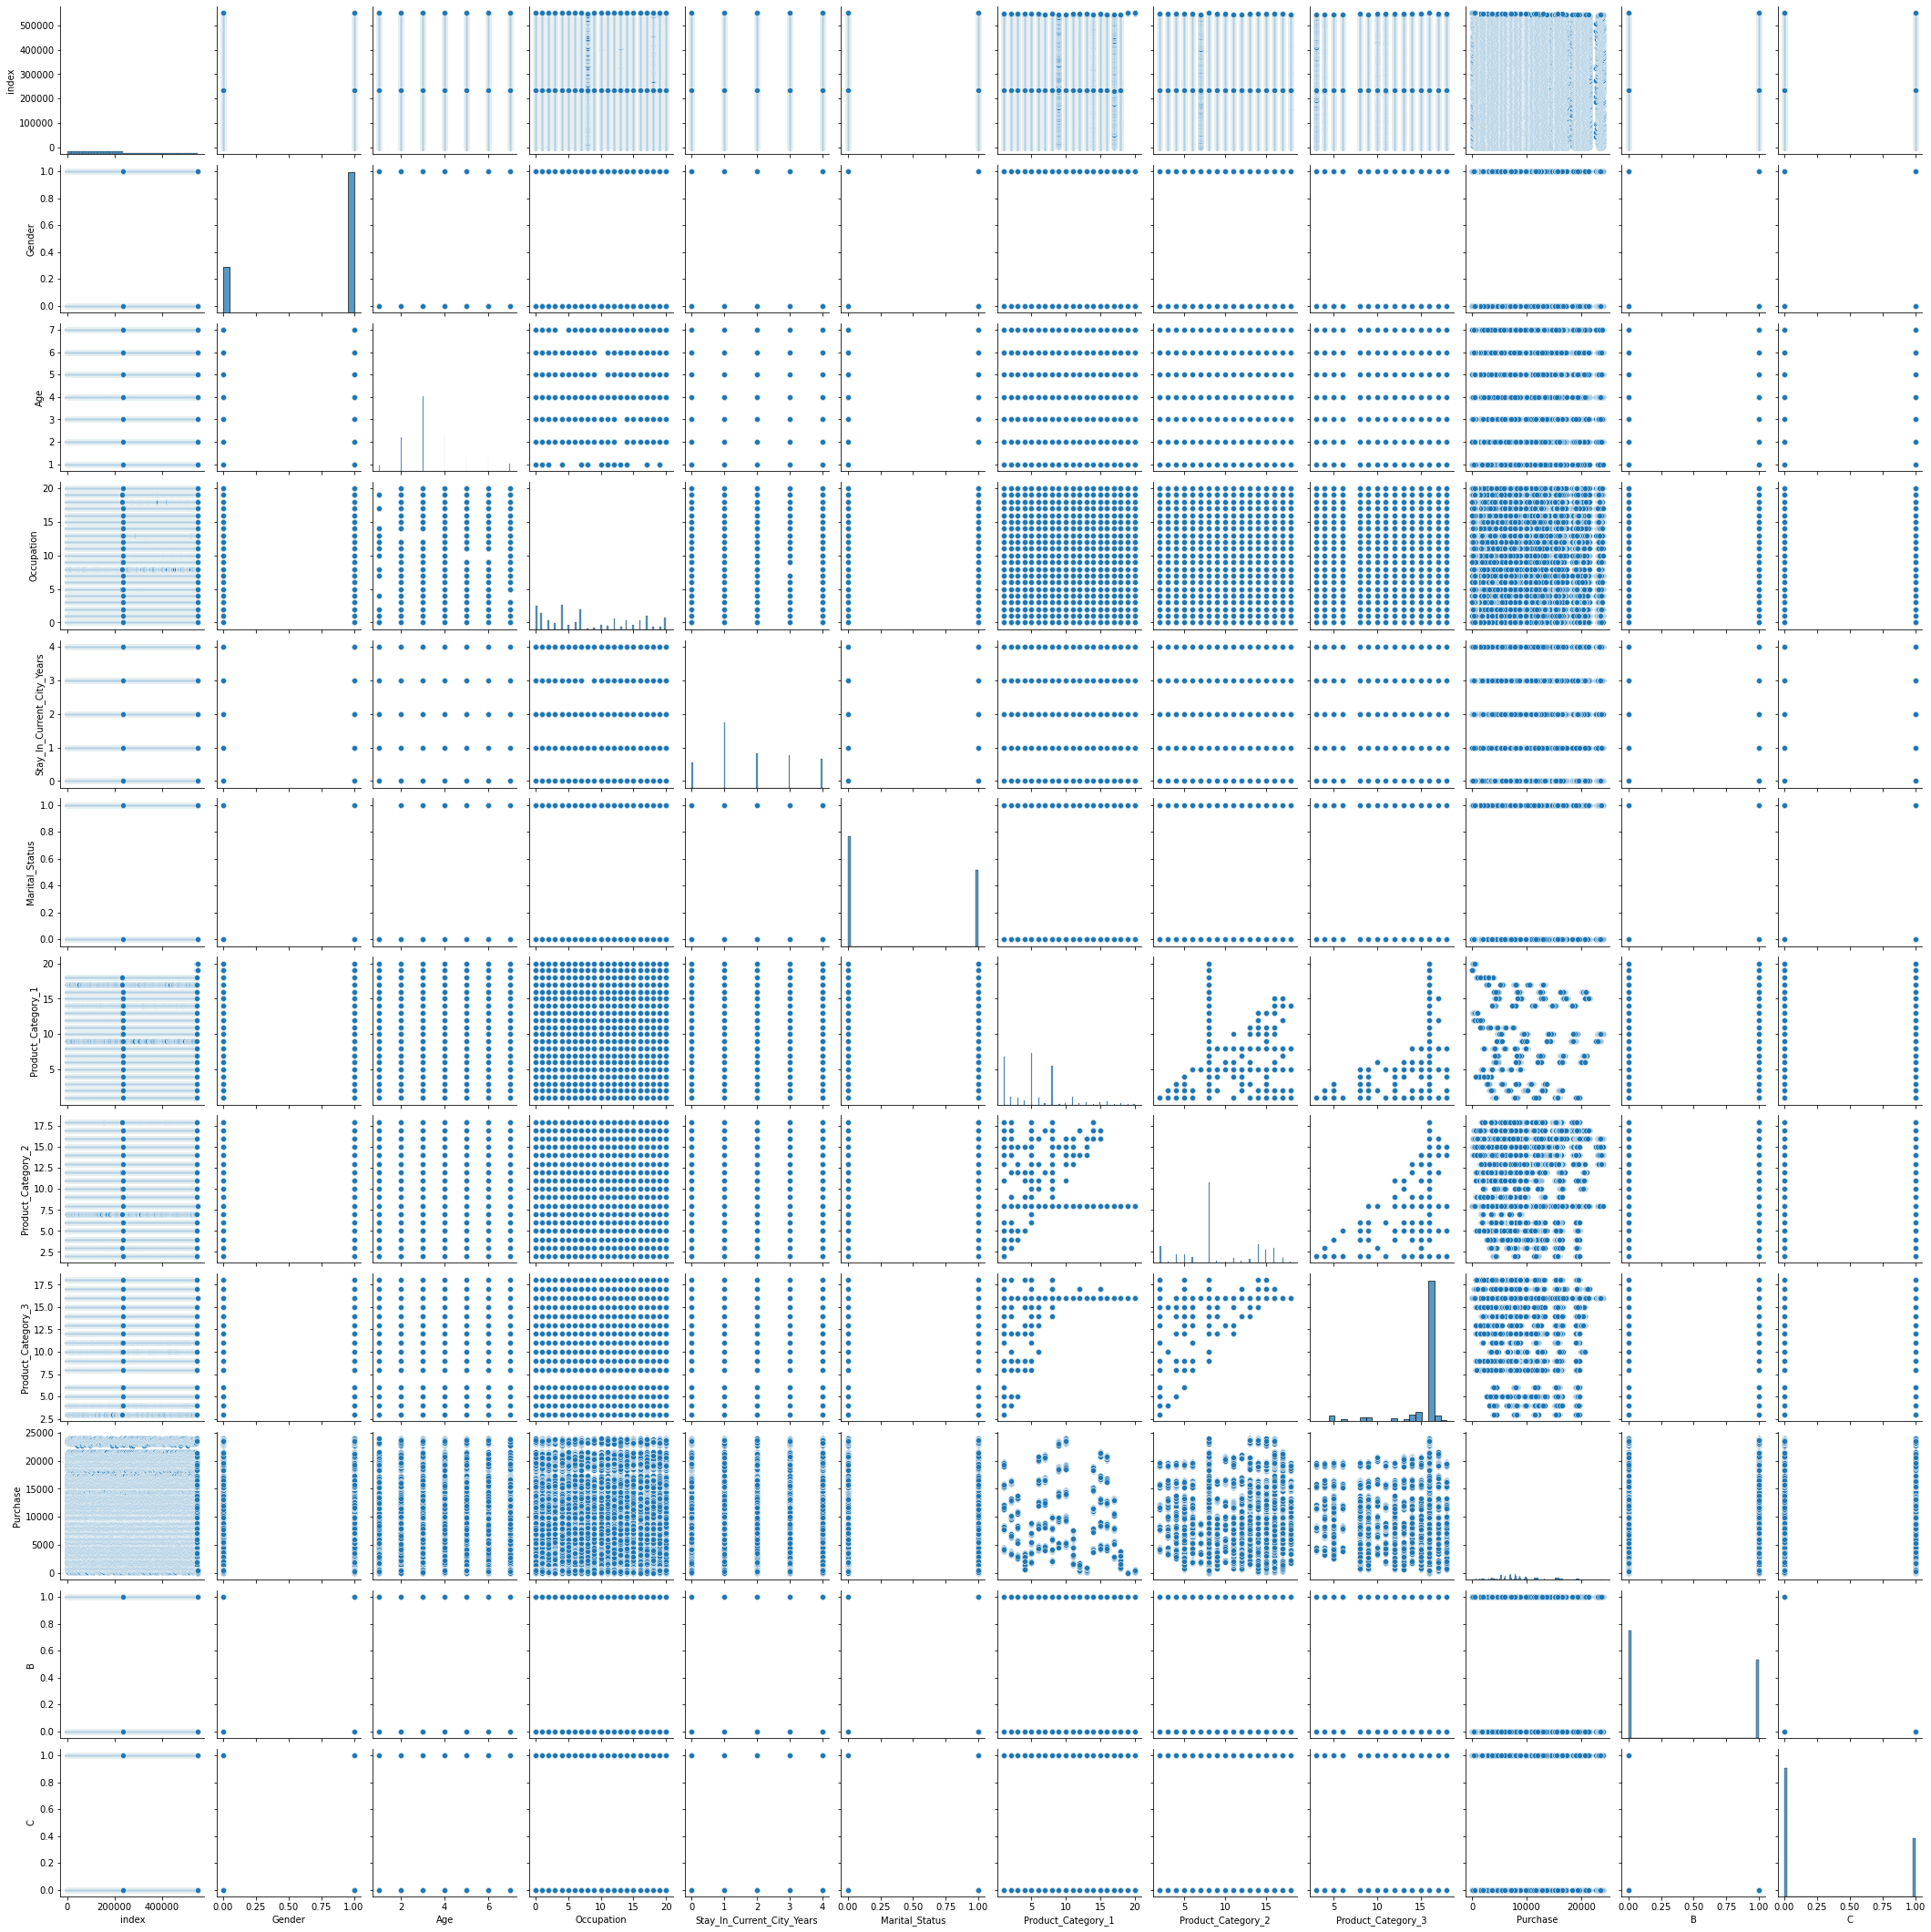

In [94]:
df1 = df1.reset_index() #to resolve the error of duplicate indexing
sns.pairplot(df1)

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

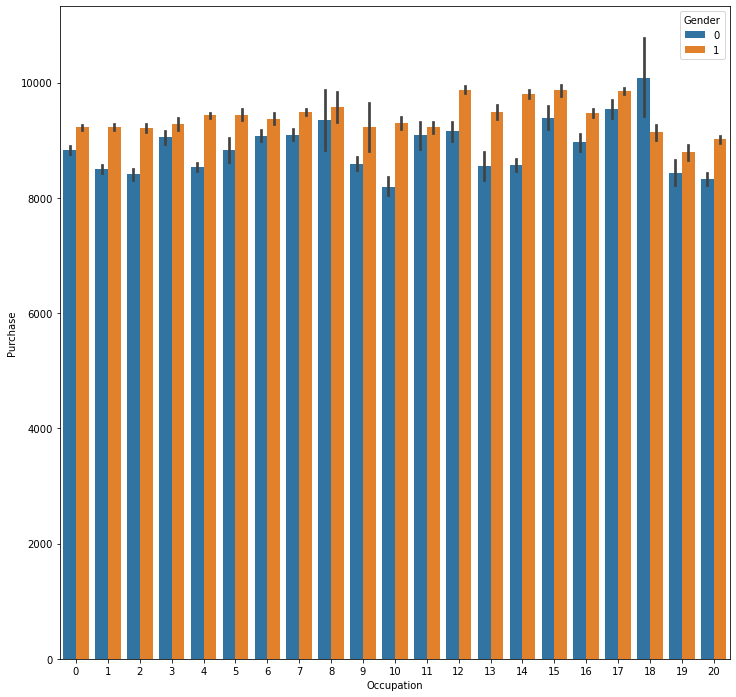

In [99]:
plt.figure(figsize=(12,12))
sns.barplot("Occupation", "Purchase", hue="Gender", data=df)

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

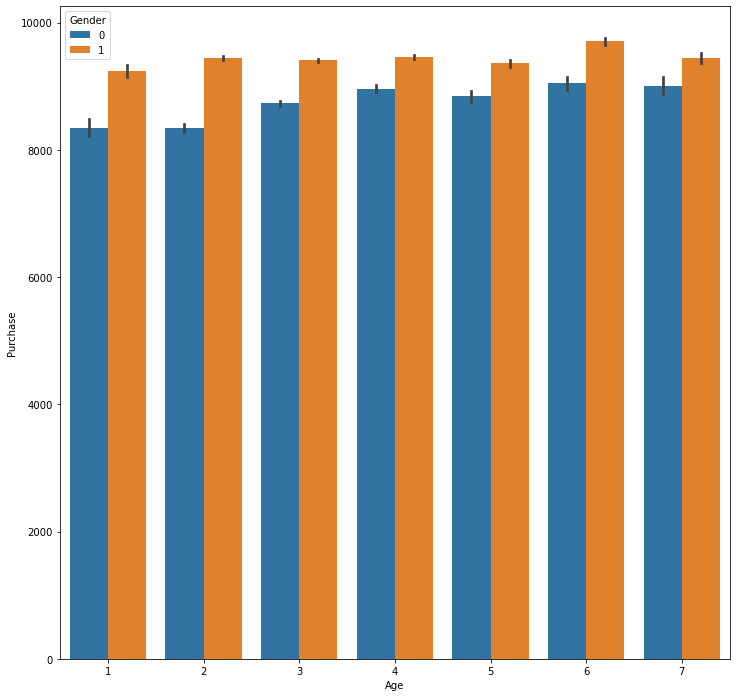

In [100]:
plt.figure(figsize=(12,12))
sns.barplot("Age", "Purchase", hue="Gender", data=df)

In [101]:
df.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
Gender,1.000000,-0.004758,0.116505,0.015026,-0.010945,-0.046208,-0.011851,-0.006651,0.060346,-0.005399,-0.000180
Age,-0.004758,1.000000,0.090882,-0.004968,0.310747,0.060336,0.041716,0.036721,0.015839,-0.016881,0.110302
Occupation,0.116505,0.090882,1.000000,0.028488,0.023563,-0.008441,0.001501,-0.001576,0.020833,-0.011721,0.035255
Stay_In_Current_City_Years,0.015026,-0.004968,0.028488,1.000000,-0.012871,-0.003518,-0.000081,-0.000308,0.005422,0.011011,0.011007
Marital_Status,-0.010945,0.310747,0.023563,-0.012871,1.000000,0.019579,0.012192,0.013808,-0.000463,-0.002804,0.034377
Product_Category_1,-0.046208,0.060336,-0.008441,-0.003518,0.019579,1.000000,0.286502,0.319209,-0.343703,-0.003863,-0.012870
Product_Category_2,-0.011851,0.041716,0.001501,-0.000081,0.012192,0.286502,1.000000,0.463528,-0.128651,-0.003944,-0.000443
Product_Category_3,-0.006651,0.036721,-0.001576,-0.000308,0.013808,0.319209,0.463528,1.000000,-0.185945,0.004291,-0.020687
Purchase,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000,-0.019098,0.061012
B,-0.005399,-0.016881,-0.011721,0.011011,-0.002804,-0.003863,-0.003944,0.004291,-0.019098,1.000000,-0.572552


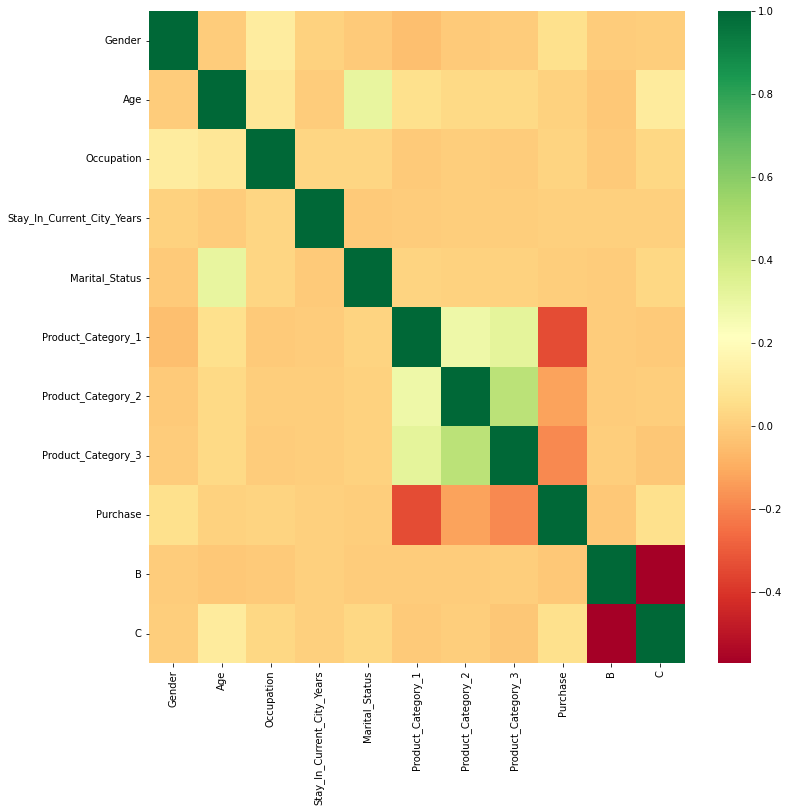

In [104]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=False, cmap="RdYlGn")
plt.show()

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


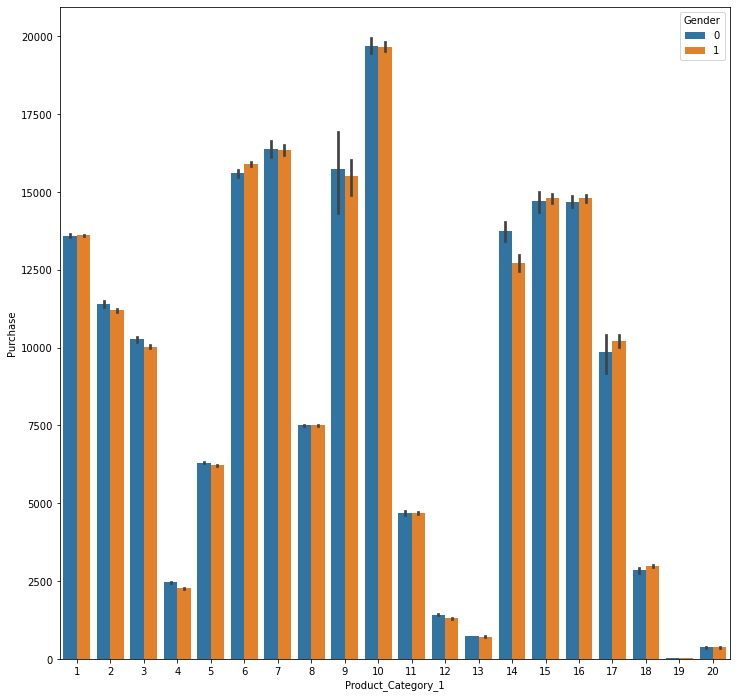

In [106]:
plt.figure(figsize=(12,12))
sns.barplot("Product_Category_1", "Purchase", hue="Gender", data=df)
plt.show()

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


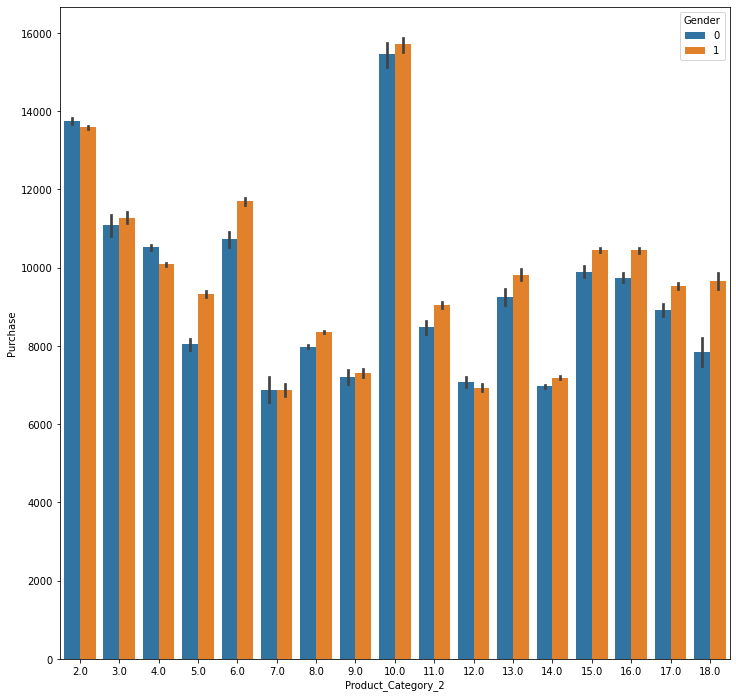

In [107]:
plt.figure(figsize=(12,12))
sns.barplot("Product_Category_2", "Purchase", hue="Gender", data=df)
plt.show()

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


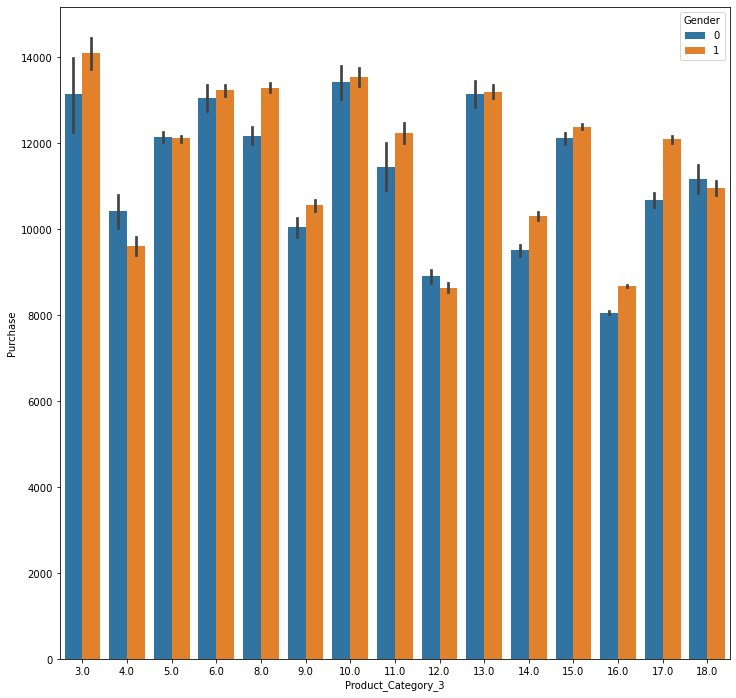

In [108]:
plt.figure(figsize=(12,12))
sns.barplot("Product_Category_3", "Purchase", hue="Gender", data=df)
plt.show()

### Feature Scaling

In [121]:
#separate training and test data based on Purchase null value because the test data should not have the purchase value
df.drop("Product_ID", axis=1, inplace=True)
df_test = df[df["Purchase"].isnull()]
df_train = df[~df["Purchase"].isnull()]

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           550068 non-null  int32  
 10  C                           550068 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 44.1 MB


In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  int64  
 1   Age                         233599 non-null  int64  
 2   Occupation                  233599 non-null  int64  
 3   Stay_In_Current_City_Years  233599 non-null  int32  
 4   Marital_Status              233599 non-null  int64  
 5   Product_Category_1          233599 non-null  int64  
 6   Product_Category_2          233599 non-null  float64
 7   Product_Category_3          233599 non-null  float64
 8   Purchase                    0 non-null       float64
 9   B                           233599 non-null  int32  
 10  C                           233599 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 18.7 MB


In [124]:
df_train.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [126]:
X = df_train[['Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'B', 'C']]
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [127]:
y=df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [132]:
regression.fit(X_train, y_train)

LinearRegression()

In [133]:
print(regression.coef_, regression.intercept_)

[  219.40340889   161.48399281    40.75197867    13.00328258
   -29.40171369 -1595.03999038    -6.24829968  -421.6489872
    76.37138564   311.82740972] 9260.52247622407


In [134]:
reg_pred =regression.predict(X_test)
reg_pred

array([11827.531432  , 10472.23195058,  7361.92482116, ...,
       10419.50288826, 11647.9911962 , 10649.86876652])

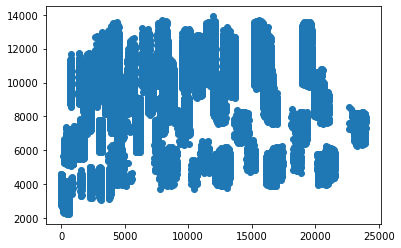

In [135]:
plt.scatter(y_test, reg_pred)

In [137]:
residual = y_test - reg_pred
residual

84432     7314.468568
72724     5040.768049
197032     440.075179
353704    4890.131920
91198    -4181.046128
             ...     
196106    1760.882891
109474   -3677.223753
433228   -4985.502888
271831    7403.008804
477613    1246.131233
Name: Purchase, Length: 181523, dtype: float64

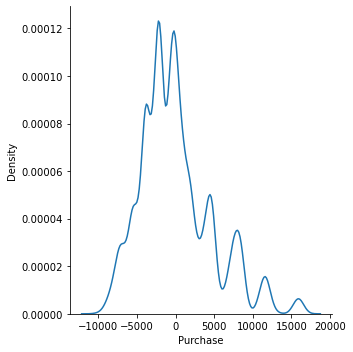

In [138]:
sns.displot(residual, kind="kde")

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

21939163.32153542
3577.237794185696
4683.9260585042775


In [140]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.12948768560712387


In [141]:
adjusted_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_score

0.129439726666977

In [143]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  int64  
 1   Age                         233599 non-null  int64  
 2   Occupation                  233599 non-null  int64  
 3   Stay_In_Current_City_Years  233599 non-null  int32  
 4   Marital_Status              233599 non-null  int64  
 5   Product_Category_1          233599 non-null  int64  
 6   Product_Category_2          233599 non-null  float64
 7   Product_Category_3          233599 non-null  float64
 8   Purchase                    0 non-null       float64
 9   B                           233599 non-null  int32  
 10  C                           233599 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 18.7 MB


In [145]:
df_test.drop("Purchase", axis=1, inplace=True)

C:\Users\cheta\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [146]:
predfortest =regression.predict(df_test)

In [147]:
predfortest

array([  2235.4308548 ,   -593.75635421,  -4762.8667143 , ...,
         3769.16760169, -12324.22153498,  -2990.86001262])